In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data-projet7.csv', decimal =".")
data.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


In [3]:
data.shape

(11599, 6)

In [4]:
for i in data.columns:
    print("La colonne '{}' :".format(i), any(pd.isna(data[i])))


La colonne 'country' : False
La colonne 'year_survey' : False
La colonne 'quantile' : False
La colonne 'nb_quantiles' : False
La colonne 'income' : False
La colonne 'gdpppp' : True


<p> Des valeurs NaN sont présentes dans la colonne 'gdpppp' </p>

In [5]:
data['gdpppp'] = data['gdpppp'].fillna(0)
#Voir après par quoi remplacer, 0 n'étant peut-être pas le bon chiffre

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
country         11599 non-null object
year_survey     11599 non-null int64
quantile        11599 non-null int64
nb_quantiles    11599 non-null int64
income          11599 non-null object
gdpppp          11599 non-null object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


Aucune colonne nulle ; Par contre on peut voir que 'income' et 'gdpppp' sont object et non numeric

In [7]:
data['gdpppp'] = data['gdpppp'].astype(str)
data['gdpppp'] = data['gdpppp'].replace(",", ".")
data['gdpppp'] = [x.replace(',', '.') for x in data['gdpppp']]
data['gdpppp'] = pd.to_numeric(data['gdpppp'])

data['income'] = data['income'].astype(str)
data['income'] = data['income'].replace(",", ".")
data['income'] = [x.replace(',', '.') for x in data['income']]
data['income'] = pd.to_numeric(data['income'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
country         11599 non-null object
year_survey     11599 non-null int64
quantile        11599 non-null int64
nb_quantiles    11599 non-null int64
income          11599 non-null float64
gdpppp          11599 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


On a bien nos colonnes 'income' et 'gdpppp' en float et plus en object

In [9]:
data.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.159900e+04
mean,2007.982757,50.500819,100.0,6069.224260,4.935532e+04
std,0.909633,28.868424,0.0,9414.185972,3.966582e+05
min,2004.000000,1.000000,100.0,16.719418,0.000000e+00
25%,2008.000000,25.500000,100.0,900.685515,2.340000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.505000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.838850e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


# Mission 1

## Années des données utilisées

<p> Testons d'abord les données ont bien une année pour chaque pays : </p>

In [10]:
for i in range(2004,2012):
    country_year  = data[data['year_survey'] == i]
    print("Le nombre de pays pour l'année {} est de : ".format(i))
    print(len(country_year['country'].unique()))

Le nombre de pays pour l'année 2004 est de : 
1
Le nombre de pays pour l'année 2005 est de : 
0
Le nombre de pays pour l'année 2006 est de : 
5
Le nombre de pays pour l'année 2007 est de : 
15
Le nombre de pays pour l'année 2008 est de : 
76
Le nombre de pays pour l'année 2009 est de : 
12
Le nombre de pays pour l'année 2010 est de : 
6
Le nombre de pays pour l'année 2011 est de : 
1


<p> Ce n'est pas le cas, deux solutions s'offrent donc à nous : <br/>
<ol><li>Prendre uniquement l'année ayant le plus de pays (ici 2008) </li>
    <li>Prendre une année par pays (mais problème dans la véracité des données)</li></ol>
</p>

In [11]:
data['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

<p> Les années présentes dans les données sont : 
    <ul><li> 2004 </li>
        <li> 2006 </li>
        <li> 2007 </li>
        <li> 2008 </li>
        <li> 2009 </li>
        <li> 2010 </li>
        <li> 2011 </li> </ul> 
</p>

## Nombre de pays présents

In [12]:
print('Le nombre de pays est de : ',len(data['country'].unique()), "toute année confondue")

Le nombre de pays est de :  116 toute année confondue


## Population couverte par l'analyse (%age de la population mondiale)

<p> Pour ce pourcentage nous prendront comme base la population mondiale de chaque année concernée. Nous établierons ensuite la moyenne de toutes ces années. </p>

In [13]:
pop = pd.read_csv('pop.csv')
pop.head()
#A merge avec l'autre df, voir ensuite avec le % de population pour chaque pays

,Unnamed: 0,Country,Countrycode3,Year,Population,PopCovr_new
0,0,Afghanistan,AFG,2007,26.911530,All
1,1,Afghanistan,AFG,2008,27.658890,All
2,2,Albania,ALB,1996,3.092034,All
3,3,Albania,ALB,2002,3.123112,All
4,4,Albania,ALB,2005,3.082172,All


## De quel type de quantile s'agit-il 

<p> Les quantiles utilisés dans les données sont des centiles. <br/>
    Le centile nous permet d'être précis dans nos calculs ; Et n'enlève pas la possibilité de prendre plus large (en décile par exemple).
</p>

## PPP

<p> Le PPP (Purchasing Power Parity) permet de prendre en compte non seulement les revenus des habitant mais aussi le coût de la vie dans le pays. <br/>
    Il est donc de ce fait beaucoup plus précis sur la richesse des habitants. </p>

# Mission 2

## Diversité des pays 

In [14]:
#Définition d'une fonction decile pour transformer les centiles en déciles
def decile (value):
    if 0<=int(value)<11 :
        return int(1)
    elif 11<=int(value)<21:
        return int(2)
    elif 21<=int(value)<31:
        return int(3)
    elif 31<=int(value)<41:
        return int(4) 
    elif 41<=int(value)<51:
        return int(5) 
    elif 51<=int(value)<61:
        return int(6) 
    elif 61<=int(value)<71:
        return int(7) 
    elif 71<=int(value)<81:
        return int(8) 
    elif 81<=int(value)<91:
        return int(9) 
    elif 91<=int(value)<101:
        return int(10) 
    else:
        return 'ERROR'
    
#Automatisation avec boucle ici ? Voir comment, chronophage à la main

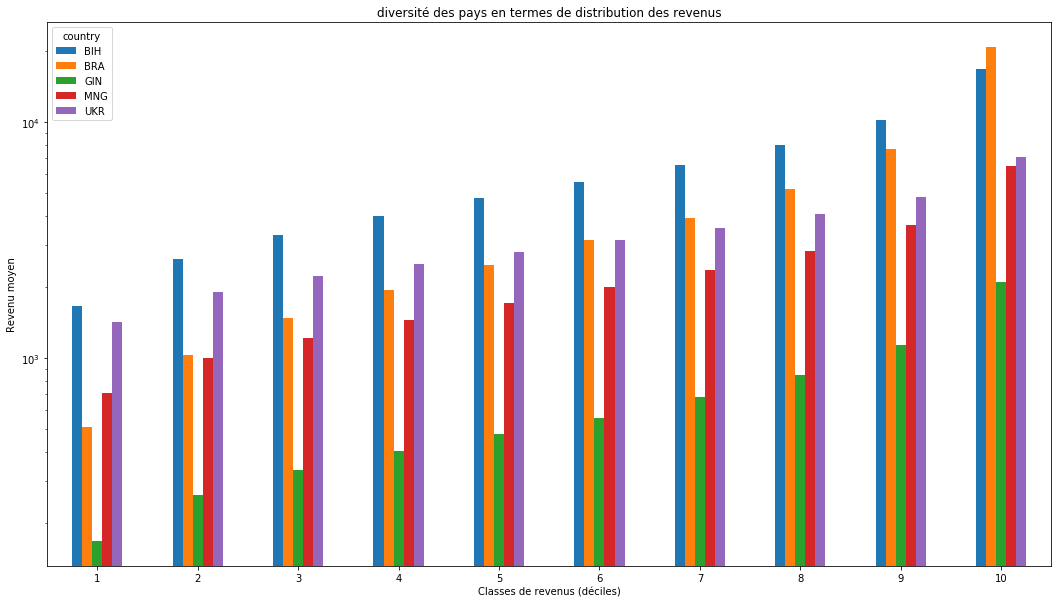

In [15]:
np.random.seed(1)
sample = np.random.randint(116, size=5)
X = data['country'].unique()[sample]
sampled_data = data[data.country.isin(X)]

sampled_data = sampled_data.reset_index()
#On applique la fonction decile au df : 
sampled_data['decile'] = sampled_data['quantile'].map(decile)

sampled_crosstab = pd.crosstab(index=sampled_data["decile"], 
                           columns=sampled_data["country"], 
                           values=sampled_data["income"],
                          aggfunc = np.mean)

sampled_crosstab.plot(kind="bar", figsize=(18,10), stacked=False)
plt.title("diversité des pays en termes de distribution des revenus")
plt.xlabel("Classes de revenus (déciles)")
plt.ylabel("Revenu moyen")
plt.yscale('log')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
#plt.savefig("Graphiques/diversité_pays.png")
plt.show()

<p> Ici les classes ont été passées en décile et non centile (pour plus de lisibilité), voir si on garde comme ça.</p>

## Courbe de Lorenz

### Définition de la fonction : 

In [16]:
def lorenz(df, name=None):
    #On prend uniquement les colonnes utiles :
    data_gini = df[['country', 'quantile', 'income']]
    
    #Calcul du coef de gini et courbe de Lorenz :    
    for pays in data_gini['country'].unique():
        #Gini
        ##D'abord trier les valeurs
        sorted_df = df['income'][df['country'] == pays].copy()
        sorted_df.sort_values()
        n = df[df['country'] == pays].size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_df)])
        coef = coef_*weighted_sum/(sorted_df.sum()) - const_
        
        #Courbe de Lorenz
        data_lorenz = data_gini[data_gini['country'] == pays]['income'].sort_values()
        data_lorenz = data_lorenz.cumsum() / data_lorenz.sum()

        fig, ax = plt.subplots(figsize=[6,6])
        ## Mise en place de la courbe
        ax.scatter(np.arange(data_lorenz.size)/(data_lorenz.size-1)*100, data_lorenz*100, 
                   marker='x', color='red', s=1)

        ## courbe à coéfficient d'égalité : 
        ax.plot([0,100], [0,100], color='black')
        plt.title("Courbe de Lorenz : {}".format(pays))
        plt.xlabel("Pourcentage de la population")
        plt.ylabel("Revenu Moyen")
        #Ajouter une étiquette avec le coefficient de Gini ? 
        #plt.savefig("Graphiques/courbe_de_lorenz_{}.png".format(pays))
        plt.show()

<p> Ajouter une étiquette avec l'indice de Gini ? </p>
<p> Attention les coef de gini sont négatif, voir en détails pourquoi</p>

### Les courbes 

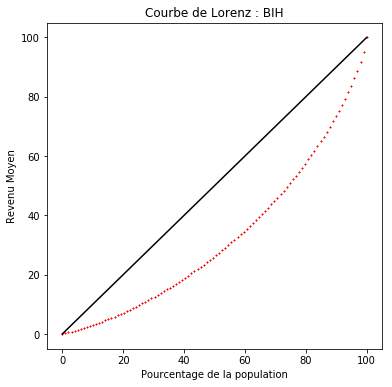

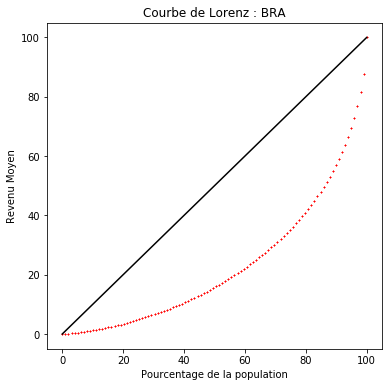

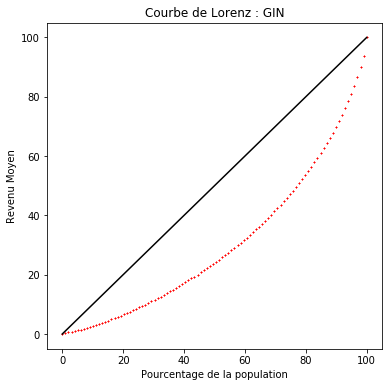

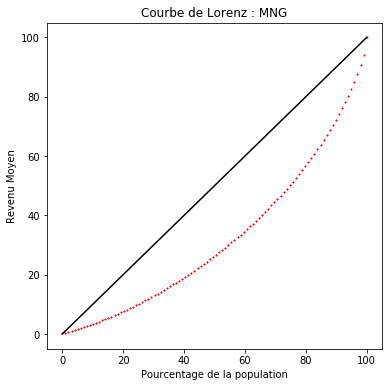

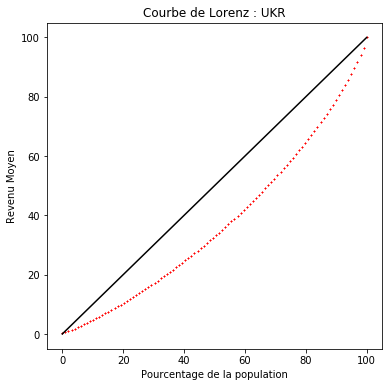

In [17]:
lorenz(sampled_data)

## Evolution de l'indice de Gini au fil des ans 

<p> Pour cette question nous allons prendre le fichier traité dans le fichier "indice_gini_pop" </p>

In [18]:
indice_gini = pd.read_csv("gini.csv")
indice_gini = indice_gini[['Country', 'Countrycode3', 'Year', 'Gini']]
indice_gini.head()

,Country,Countrycode3,Year,Gini
0,Afghanistan,AFG,2007,29.00
1,Afghanistan,AFG,2008,27.80
2,Albania,ALB,1996,28.00
3,Albania,ALB,2002,31.74
4,Albania,ALB,2005,30.60


In [19]:
sampled_gini = indice_gini[indice_gini["Countrycode3"].isin(X)]
sampled_gini.head()

,Country,Countrycode3,Year,Gini
895,Bosnia and Herzegovina,BIH,1991,32.90
896,Bosnia and Herzegovina,BIH,2001,29.97
897,Bosnia and Herzegovina,BIH,2004,34.04
898,Bosnia and Herzegovina,BIH,2007,33.06
899,Bosnia and Herzegovina,BIH,2011,33.83


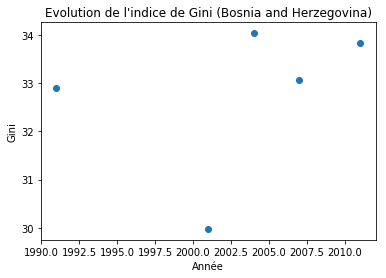

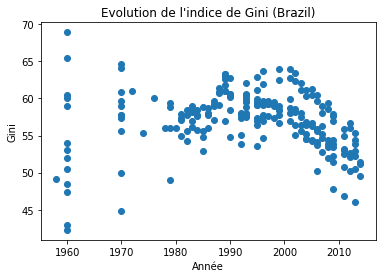

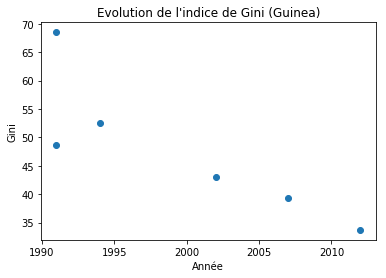

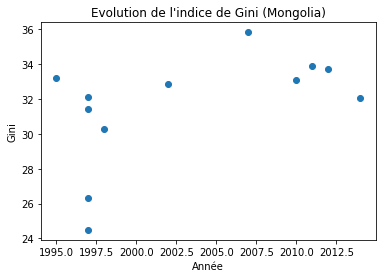

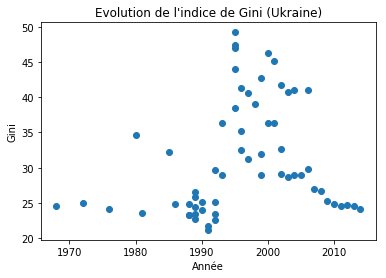

In [20]:
for pays in sampled_gini['Country'].unique():    
    Y = sampled_gini[sampled_gini['Country'] == pays]
    plt.scatter(Y['Year'], Y['Gini'])
    plt.title("Evolution de l'indice de Gini ({})".format(pays))
    plt.xlabel('Année')
    plt.ylabel('Gini')
    plt.show()

## Classement des pays par indice de Gini 

### Calcul des indices de Gini pour chaque pays 

In [21]:
gini_coef = []
def gini(arr):
    for pays in data_gini['country'].unique():
        #Gini
        ##D'abord trier les valeurs
        sorted_df = df['income'][df['country'] == pays].copy()
        sorted_df.sort_values()
        n = df[df['country'] == pays].size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_df)])
        coef = coef_*weighted_sum/(sorted_df.sum()) - const_
        gini_coef.append(coef)

In [22]:
#Voir en fonction des années, laquelle on prend...

# Mission 3